<a href="https://colab.research.google.com/github/jaswu51/ComputerVision/blob/main/autoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dog dataset

In [286]:
! pip install -q kaggle

In [287]:
# !mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"yourApiName","key":"yourkey"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [288]:
!kaggle datasets download -d erkamk/cat-and-dog-images-dataset

cat-and-dog-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [289]:
!pip install torchshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import zipfile,os
import warnings
import torchvision.transforms.functional as F
import torchvision.transforms as transforms
from torchvision import datasets
import torch.nn as nn
import torch.nn.functional as f
from PIL import Image
import torch
from pathlib import Path
import torchshow as ts

In [291]:
#unzip the downloaded dataset, use only the dog data
working_directory = os.getcwd()
os.chdir(working_directory)
for file in os.listdir(working_directory):   # get the list of files
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as item: # treat the file as a zip
           item.extractall()  # extract it in the working directory

In [292]:
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    # transforms.Normalize(0.5,0.5,0.5)
])

In [293]:
training_data_list = []
training_data_tensor=[]
path="/content/Dog"
def create_training_data():
  for img in os.listdir(path):
    try:
      img=Path(path, img)
      img=Image.open(img)
      img = transform(img)
      training_data_list.append([img])
    except Exception as e:
      pass
  for i in training_data_list:
    training_data_tensor.append(torch.cat(i))
create_training_data()

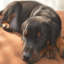

In [294]:
F.to_pil_image(training_data_tensor[0])

In [295]:
len(training_data_tensor)

500

In [296]:
# assgin 50 imgs for each batch
train_loader = torch.utils.data.DataLoader(
    training_data_tensor, batch_size=50, shuffle=True)

# build a simple autoEncoder

In [297]:
class autoEncoder(nn.Module):
  def __init__(self,input_dim,encoding_dim) -> None:
    super(autoEncoder,self).__init__()
    self.encoder=nn.Linear(input_dim,encoding_dim)
    self.decoder=nn.Linear(encoding_dim,input_dim)
  def forward(self,x):
    encoded= f.relu(self.encoder(x))
    decoded= self.decoder(encoded)
    return decoded

In [298]:
input_dim=64*64*3
encoding_dim=100
model=autoEncoder(input_dim,encoding_dim)
optimizer =torch.optim.Adam(model.parameters())
loss_fn=torch.nn.MSELoss()

In [299]:
output_tensor=[]
from torch.optim.optimizer import Optimizer
def training_process(model,loss_fn,data_loader=train_loader, epochs=10,optimizer=optimizer):
  model.train()
  for epoch in range(epochs):
    for batch_idx,train_data in enumerate(train_loader):
      X= train_data.view([-1,input_dim])
      optimizer.zero_grad()
      output=model(X)
      optimizer.step()
      loss=loss_fn(output,X)
      output_tensor.append(output)
      if batch_idx%2==0 or batch_idx==9 :
        print('train epoch {} batch {} with MSE Loss {}'.format(epoch,batch_idx,loss.data.item()))
training_process(model,loss_fn,train_loader,epochs=10,optimizer=optimizer)

train epoch 0 batch 0 with MSE Loss 0.29027852416038513
train epoch 0 batch 2 with MSE Loss 0.2761017978191376
train epoch 0 batch 4 with MSE Loss 0.28151988983154297
train epoch 0 batch 6 with MSE Loss 0.3170468509197235
train epoch 0 batch 8 with MSE Loss 0.29902583360671997
train epoch 0 batch 9 with MSE Loss 0.2779117226600647
train epoch 1 batch 0 with MSE Loss 0.29964742064476013
train epoch 1 batch 2 with MSE Loss 0.31511247158050537
train epoch 1 batch 4 with MSE Loss 0.29003843665122986
train epoch 1 batch 6 with MSE Loss 0.2987866699695587
train epoch 1 batch 8 with MSE Loss 0.305463582277298
train epoch 1 batch 9 with MSE Loss 0.28960180282592773
train epoch 2 batch 0 with MSE Loss 0.2964562177658081
train epoch 2 batch 2 with MSE Loss 0.3120309114456177
train epoch 2 batch 4 with MSE Loss 0.2936067581176758
train epoch 2 batch 6 with MSE Loss 0.2933723032474518
train epoch 2 batch 8 with MSE Loss 0.2712637484073639
train epoch 2 batch 9 with MSE Loss 0.29421132802963257
tra

# compare the reconstruction image

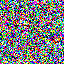

In [300]:
a=output_tensor[0][0]
b=torch.reshape(a,(3,64,64))
F.to_pil_image(b)

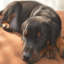

In [301]:
F.to_pil_image(training_data_tensor[0])